In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

"wget" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [3]:
!head adult.data

"head" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [7]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [87]:
df = pd.read_csv('adult.data',sep=', ', names=cols, engine='python')

In [88]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [89]:
df.shape

(32561, 15)

# Сколько мужчин и женщин?

In [90]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [91]:
df.age.mean()

38.58164675532078

# Какая доля граждан США (United-States) в данном датасете?

In [93]:
siries = df.iloc[:, 13].value_counts()
siries['United-States']/siries.sum()

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

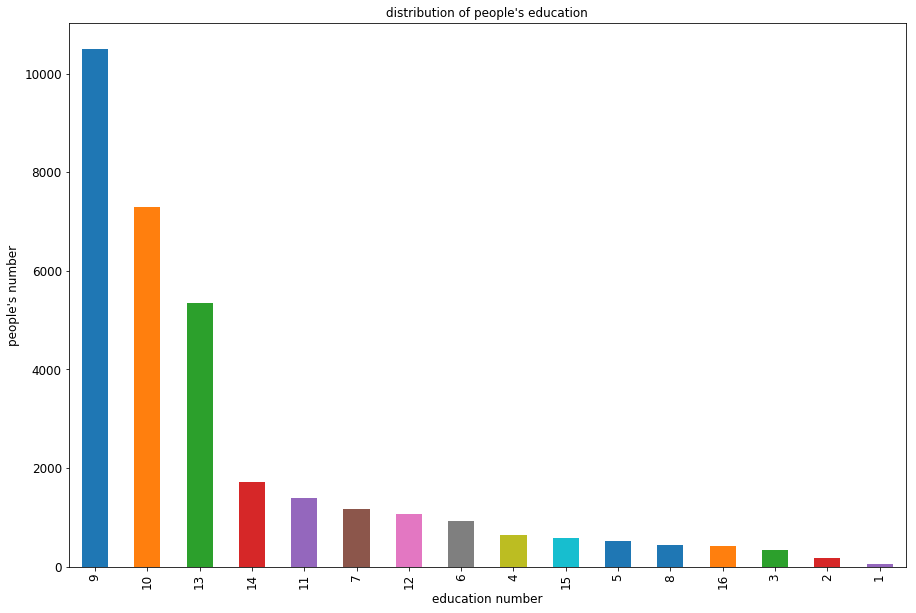

In [94]:
ax =  df.iloc[:, 4].value_counts().plot(kind='bar', title ="distribution of people's education", figsize=(15, 10), legend=False, fontsize=12)
ax.set_xlabel("education number", fontsize=12)
ax.set_ylabel("people's number", fontsize=12)
plt.show()

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [96]:
df.groupby('marital-status')['fnlwgt'].mean()['Divorced']

185802.79045689848

In [97]:
df.groupby('marital-status')['fnlwgt'].std()['Divorced']

105646.78945933616

In [98]:
cond=df['marital-status']=='Divorced'
cond.value_counts()

False    28118
True      4443
Name: marital-status, dtype: int64

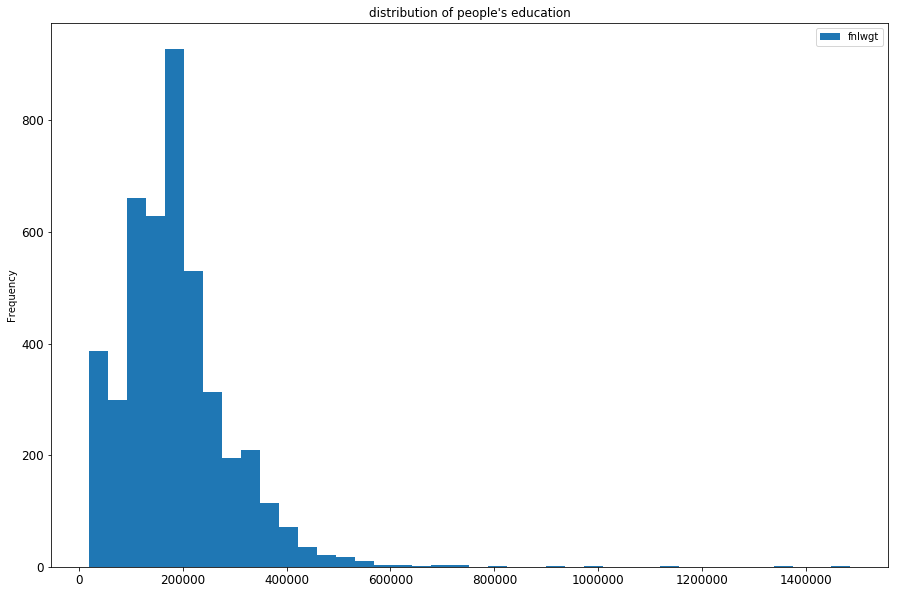

In [112]:
ax =  df[cond]['fnlwgt'].plot(kind='hist', title ="distribution of people's education", figsize=(15, 10), legend=True, fontsize=12, bins=40)
plt.show()

> Ответ: оно мне напоминает ... распределение

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [99]:
condition = df['result'].apply( lambda x: x == '>50K' )
rich_ones = df[condition]
condition2 = rich_ones['education-num'].apply( lambda x: (x>12 and x!=15))
rich_ones[condition2].shape[0]/rich_ones.shape[0]

0.4445861497258003

> Ответ: Нет.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [100]:
df.groupby('education')['hours-per-week'].mean()

education
10th            37.052519
11th            33.925957
12th            35.780600
1st-4th         38.255952
5th-6th         38.897898
7th-8th         39.366873
9th             38.044747
Assoc-acdm      40.504217
Assoc-voc       41.610709
Bachelors       42.614006
Doctorate       46.973366
HS-grad         40.575374
Masters         43.836332
Preschool       36.647059
Prof-school     47.425347
Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [101]:
df.groupby('sex')['hours-per-week'].mean()

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [103]:
#df.groupby(['relationship', 'marital-status']).describe()
in_relationships = ['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent']
condition_rel = df['marital-status'].apply(lambda x: (x in in_relationships))
condition_not_rel = df['marital-status'].apply(lambda x: not(x in in_relationships))
df_in_rel = df[condition_rel]
df_not_in_rel = df[condition_not_rel]
df_in_rel['hours-per-week'].mean()/df_not_in_rel['hours-per-week'].mean()

1.1373714920589946

# Из каких стран люди работают farmers/fishers?

In [104]:
df[df.groupby('native-country')['occupation'].apply(lambda x: x=='Farming-fishing')]['native-country'].value_counts()

United-States    879
Mexico            77
?                  5
Puerto-Rico        5
Philippines        4
Guatemala          4
El-Salvador        2
Vietnam            2
Italy              2
Cuba               2
Canada             2
Hong               1
Ireland            1
Portugal           1
Cambodia           1
Japan              1
Yugoslavia         1
Germany            1
France             1
England            1
Poland             1
Name: native-country, dtype: int64

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [105]:
max_hours = df['hours-per-week'].max()

In [106]:
df[df['hours-per-week'].apply(lambda x: x==max_hours)].shape[0]

85

In [107]:
df[df['hours-per-week'].apply(lambda x: x==max_hours)]['result'].value_counts()

<=50K    60
>50K     25
Name: result, dtype: int64